In [1]:
import pygor.load
import pathlib
import os
import sys
import importlib
%reload_ext autoreload
%autoreload 2

c:\Users\SimenLab\miniconda3\envs\strfsclone\lib\site-packages\skimage\util\dtype.py:27: DeprecationWarning: `np.bool8` is a deprecated alias for `np.bool_`.  (Deprecated NumPy 1.24)
  np.bool8: (False, True),


Found 6 custom classes in C:\Users\SimenLab\OneDrive\Universitet\PhD\GitHub repos\pygor\src\pygor\classes
Class names: ['CenterSurround', 'Core', 'Experiment', 'FullField', 'MovingBars', 'STRF']
Access custom classes using 'from pygor.load import ClassName'


In [2]:
pygor.load.dynamic_import()

Class 'CenterSurround' is already imported, skipping.
Class 'Core' is already imported, skipping.
Class 'Experiment' is already imported, skipping.
Class 'FullField' is already imported, skipping.
Class 'MovingBars' is already imported, skipping.
Class 'STRF' is already imported, skipping.
Access custom classes using 'from pygor.load import ClassName'


C:\Users\SimenLab\OneDrive\Universitet\PhD\GitHub repos\pygor\src\pygor\load.py:37: UserWarning: Class 'CenterSurround' is already imported, skipping.
  warnings.warn(f"Class '{obj.__name__}' is already imported, skipping.", UserWarning)
C:\Users\SimenLab\OneDrive\Universitet\PhD\GitHub repos\pygor\src\pygor\load.py:37: UserWarning: Class 'Core' is already imported, skipping.
  warnings.warn(f"Class '{obj.__name__}' is already imported, skipping.", UserWarning)
C:\Users\SimenLab\OneDrive\Universitet\PhD\GitHub repos\pygor\src\pygor\load.py:37: UserWarning: Class 'Experiment' is already imported, skipping.
  warnings.warn(f"Class '{obj.__name__}' is already imported, skipping.", UserWarning)
C:\Users\SimenLab\OneDrive\Universitet\PhD\GitHub repos\pygor\src\pygor\load.py:37: UserWarning: Class 'FullField' is already imported, skipping.
  warnings.warn(f"Class '{obj.__name__}' is already imported, skipping.", UserWarning)
C:\Users\SimenLab\OneDrive\Universitet\PhD\GitHub repos\pygor\src\p

In [20]:
def get_submodules(main_module_name):
    main_module = importlib.import_module(main_module_name)
    submodules = []
    for submodule_name in dir(main_module):
        submodule = getattr(main_module, submodule_name)
        if isinstance(submodule, type(main_module)) and submodule.__package__ == main_module.__package__:
            submodules.append(submodule)
    return submodules

def get_submodule_class_names(main_module_name):
    main_module = importlib.import_module(main_module_name)
    submodules_with_classes = []
    for submodule_name in dir(main_module):
        submodule = getattr(main_module, submodule_name)
        if isinstance(submodule, type(main_module)) and submodule.__package__ == main_module.__package__:
            classes = [cls.__name__ for cls in vars(submodule).values() if isinstance(cls, type) and cls.__module__ == submodule.__name__]
            if len(classes) == 1:
                submodules_with_classes.append((submodule_name, classes[0]))
    return submodules_with_classes

# Example usage:
main_module_name = 'pygor.classes'
submodules_with_classes = get_submodule_class_names(main_module_name)
submodules = get_submodules(main_module_name)
for submodule_name, class_name in submodules_with_classes:
    print(f"Submodule: {submodule_name}, Class: {class_name}")

Submodule: centre_surround, Class: CenterSurround
Submodule: core_data, Class: Core
Submodule: experiment, Class: Experiment
Submodule: full_field, Class: FullField
Submodule: moving_bars, Class: MovingBars
Submodule: strf, Class: STRF


In [27]:
submodules

[<module 'pygor.classes.centre_surround' from 'C:\\Users\\SimenLab\\OneDrive\\Universitet\\PhD\\GitHub repos\\pygor\\src\\pygor\\classes\\centre_surround.py'>,
 <module 'pygor.classes.core_data' from 'C:\\Users\\SimenLab\\OneDrive\\Universitet\\PhD\\GitHub repos\\pygor\\src\\pygor\\classes\\core_data.py'>,
 <module 'pygor.classes.experiment' from 'C:\\Users\\SimenLab\\OneDrive\\Universitet\\PhD\\GitHub repos\\pygor\\src\\pygor\\classes\\experiment.py'>,
 <module 'pygor.classes.full_field' from 'C:\\Users\\SimenLab\\OneDrive\\Universitet\\PhD\\GitHub repos\\pygor\\src\\pygor\\classes\\full_field.py'>,
 <module 'pygor.classes.moving_bars' from 'C:\\Users\\SimenLab\\OneDrive\\Universitet\\PhD\\GitHub repos\\pygor\\src\\pygor\\classes\\moving_bars.py'>,
 <module 'pygor.classes.strf' from 'C:\\Users\\SimenLab\\OneDrive\\Universitet\\PhD\\GitHub repos\\pygor\\src\\pygor\\classes\\strf.py'>]

In [22]:
submodules_with_classes

[('centre_surround', 'CenterSurround'),
 ('core_data', 'Core'),
 ('experiment', 'Experiment'),
 ('full_field', 'FullField'),
 ('moving_bars', 'MovingBars'),
 ('strf', 'STRF')]

In [42]:
main_module = "pygor.classes"
submodules_with_classes = get_submodule_class_names(main_module)
for submodule, user_class in submodules_with_classes:
    submodule_full = main_module + "." + submodule
    submodule_obj = importlib.import_module(submodule_full)
    class_obj = getattr(submodule_obj, user_class)

<class 'pygor.classes.centre_surround.CenterSurround'>
<class 'pygor.classes.core_data.Core'>
<class 'pygor.classes.experiment.Experiment'>
<class 'pygor.classes.full_field.FullField'>
<class 'pygor.classes.moving_bars.MovingBars'>
<class 'pygor.classes.strf.STRF'>


In [3]:
repo = pathlib.Path(os.getcwd()).parent
example_data = repo.joinpath(repo, "Example_data/example_exp.h5")
test_strf = pygor.analyses.STRF(example_data)
test_data = pygor.analyses.Core(example_data)

C:\Users\SimenLab\OneDrive\Universitet\PhD\GitHub repos\pygor\src\pygor\classes\strf.py:65: UserWarning: Rotation detected and corrected for c:\Users\SimenLab\OneDrive\Universitet\PhD\GitHub repos\pygor\Example_data\example_exp.h5
  self.strfs = pygor.data_helpers.load_strf(HDF5_file)


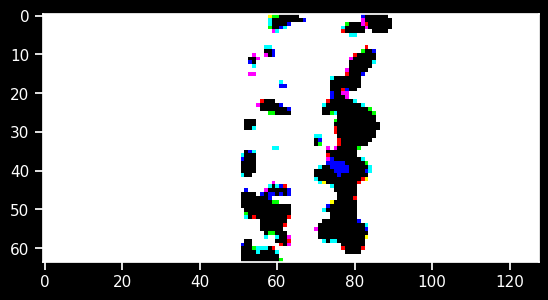

In [5]:
test_data.view_drift()

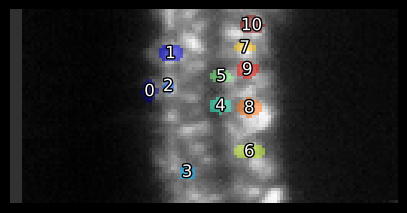

In [8]:
test_data.view_stack_rois()

In [4]:
test_data.averages

nan

In [11]:
test.plot_averages()

AttributeError: self.averages is nan, meaning it has likely not been generated

In [19]:
%run -e ../tests/STRF_unit_test.py

C:\Users\Simen\OneDrive\Universitet\PhD\GitHub repos\pygor\src\pygor\classes\strf.py:65: UserWarning: Rotation detected and corrected for c:\Users\Simen\OneDrive\Universitet\PhD\GitHub repos\pygor\Example_data\example_exp.h5
  self.strfs = pygor.data_helpers.load_strf(HDF5_file)
.

Disallowed keys: ['bs_already_ran', 'bs_datetime', 'bs_datetime_str', 'bs_dur_timedelta']


C:\Users\Simen\OneDrive\Universitet\PhD\GitHub repos\pygor\src\pygor\classes\strf.py:179: UserWarning: Input anomalies found
  warnings.warn(warning_string, stacklevel=0)


Hang on, bootstrapping pygor.temporal components 10 times:   0%|          | 0/44 [00:00<?, ?it/s]

Hang on, bootstrapping spatial components 10 times:   0%|          | 0/44 [00:00<?, ?it/s]

..

.C:\Users\Simen\OneDrive\Universitet\PhD\GitHub repos\pygor\src\pygor\classes\core_data.py:326: UserWarning: No repetitions detected, returning original images
  warnings.warn("No repetitions detected, returning original images")
c:\Users\Simen\miniconda3\envs\strfclone\lib\site-packages\numpy\lib\function_base.py:518: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis, **keepdims_kw)
c:\Users\Simen\miniconda3\envs\strfclone\lib\site-packages\numpy\core\_methods.py:184: RuntimeWarning: invalid value encountered in divide
  ret = um.true_divide(
C:\Users\Simen\OneDrive\Universitet\PhD\GitHub repos\pygor\tests\STRF_unit_test.py:30: UserWarning: Method get_help gave AttributeError
  warnings.warn(f"Method {i} gave AttributeError")
C:\Users\Simen\OneDrive\Universitet\PhD\GitHub repos\pygor\tests\STRF_unit_test.py:30: UserWarning: Method plot_averages gave AttributeError
  warnings.warn(f"Method {i} gave AttributeError")
C:\Users\Simen\OneDrive\Universitet\PhD\GitHub repos\pygor\src\p

In [156]:
import os, pathlib
os.getcwd()

'c:\\Users\\Simen\\OneDrive\\Universitet\\PhD\\GitHub repos\\pygor'

In [157]:
test.save_pkl(os.getcwd(), "test.pkl")

In [35]:
import matplotlib.pyplot as plt

In [73]:
pygor.temporal.spectral_centroid(test.timecourses()[5, 0])[2]


1.1945252774937223

In [ ]:
STRF.save_pkl

In [13]:
test.timecourses().data

array([[[  0.        ,   0.17049172,   1.04181407, ..., -12.12025019,
          -8.3210439 ,  -4.39089154],
        [  0.        ,   0.        ,   0.        , ...,   0.        ,
           0.        ,   0.        ]],

       [[  0.        ,   0.19939171,   0.4548505 , ...,  -4.03171814,
          -2.95838338,  -1.57717028],
        [  0.        ,   0.        ,   0.        , ...,   0.        ,
           0.        ,   0.        ]],

       [[  0.        ,  -0.27492294,  -0.49753022, ...,  -1.09266983,
          -0.93472604,  -0.96576875],
        [  0.        ,   0.05597824,  -0.22194533, ...,   0.91855563,
           1.07363275,   0.98545719]],

       ...,

       [[  0.        ,   0.42344721,   0.6805734 , ...,  -1.81246486,
          -0.56769558,  -0.21154422],
        [  0.        ,   0.61964027,   1.24321724, ...,   2.64093108,
           3.1640968 ,   2.41279266]],

       [[  0.        ,   0.        ,   0.        , ...,   0.        ,
           0.        ,   0.        ],
       

In [7]:
test.phase_num

1

In [54]:
test.get_help()


Welcome to your data object! 
Below are attributes and methods, as well as some metadata.
Pass 'hint = True' for more tips and hints on using the data class.
    ## Class info:
        Current data type: 
        ['STRF']
        Current metadata: 
       { 'exp_date': datetime.date(2023, 11, 14),
         'exp_time': datetime.time(16, 16, 15),
         'filename': 'C:\\Users\\Simen\\Downloads\\2023-11-14_0_0_SWN_200_Colours.h5',
         'objectiveXYZ': (-126820.0, -74368.0, -124050.0)}

    ## Attributes
        Here's the data you have access to -> pass 'types = True' for type hints, attr (type):
    [ 'averages', 'bs_bool', 'bs_settings', 'data_types', 'filename', 'frame_hz', 'images', 'ipl_depths',
      'metadata', 'ms_dur', 'multicolour', 'name', 'num_rois', 'num_strfs', 'numcolour', 'phase_num', 'rois',
      'snippets', 'strf_keys', 'strfs', 'trigger_mode', 'triggerstimes_frame', 'triggertimes', 'type']
    
    ## Methods
        Here's some actions you have -> pass 'types =

In [4]:
pygor.data_objs.data_objects_beta

AttributeError: module 'pygor.data_objs' has no attribute 'data_objects_beta'